In [41]:
# import the necessary packages
from imutils import contours
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [87]:
# load the image, convert it to grayscale, and blur it
path='C:/Users/NNL1COB/Desktop/repo/ligths_detection/indi/'
image = cv2.imread(path+'2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

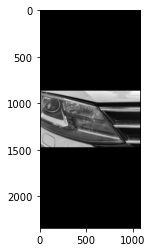

In [88]:
plt.imshow(blurred, cmap = plt.cm.gray)
plt.show()

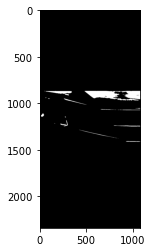

In [89]:
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap = plt.cm.gray)
plt.show()

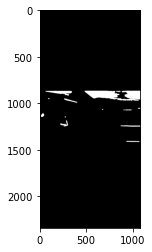

In [90]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
plt.imshow(thresh, cmap = plt.cm.gray)
plt.show()

In [91]:
import argparse
import numpy as np
import cv2

In [92]:
path='C:/Users/NNL1COB/Desktop/repo/ligths_detection/tail/'
image = cv2.imread(path+'1.jpg')
blur_image = cv2.medianBlur(image, 3)
hsv_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2HSV)

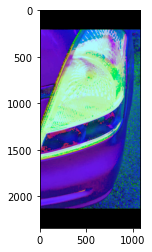

In [93]:
plt.imshow(hsv_image)
plt.show()

In [74]:
def create_hue_mask(image, lower_color, upper_color):
    lower = np.array(lower_color, np.uint8)
    upper = np.array(upper_color, np.uint8)
 
    # Create a mask from the colors
    mask = cv2.inRange(image, lower, upper)
    output_image = cv2.bitwise_and(image, image, mask = mask)
    return output_image

# Get lower red hue
lower_red_hue = create_hue_mask(hsv_image, [0, 100, 100], [10, 255, 255])

# Get higher red hue
higher_red_hue = create_hue_mask(hsv_image, [160, 100, 100], [179, 255, 255])

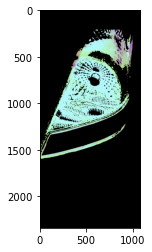

In [75]:
plt.imshow(higher_red_hue)
plt.show()

In [76]:
full_image = cv2.addWeighted(lower_red_hue, 1.0, higher_red_hue, 1.0, 0.0)

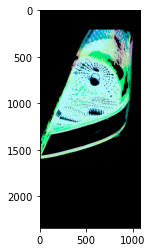

In [77]:
plt.imshow(full_image)
plt.show()

In [69]:
# Convert image to grayscale
image_gray = cv2.cvtColor(full_image, cv2.COLOR_BGR2GRAY)

# Find circles in the image
circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1.2, 100)

In [70]:
circles = np.round(circles[0, :]).astype("int")
for (center_x, center_y, radius) in circles:
    cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 4)

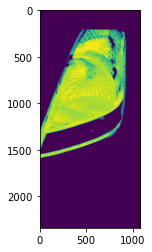

In [71]:
plt.imshow(image_gray)
plt.show()